**IMPORT LIBRARIES AND DATASETS**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files
uploaded = files.upload()
import io
 
sales_df = pd.read_csv(io.BytesIO(uploaded['IceCreamData.csv']))
print(sales_df)




Saving IceCreamData.csv to IceCreamData.csv
     Temperature     Revenue
0      24.566884  534.799028
1      26.005191  625.190122
2      27.790554  660.632289
3      20.595335  487.706960
4      11.503498  316.240194
..           ...         ...
495    22.274899  524.746364
496    32.893092  755.818399
497    12.588157  306.090719
498    22.362402  566.217304
499    28.957736  655.660388

[500 rows x 2 columns]


In [ ]:
sales_df.head()

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194


In [ ]:
sales_df.tail(8)

,Temperature,Revenue
492,23.056214,552.819351
493,14.931506,377.430928
494,25.112066,571.434257
495,22.274899,524.746364
496,32.893092,755.818399
497,12.588157,306.090719
498,22.362402,566.217304
499,28.957736,655.660388


In [ ]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  500 non-null    float64
 1   Revenue      500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


In [ ]:
sales_df.describe()

,Temperature,Revenue
count,500.000000,500.000000
mean,22.232225,521.570777
std,8.096388,175.404751
min,0.000000,10.000000
25%,17.122258,405.558681
50%,22.392791,529.368565
75%,27.740674,642.257922
max,45.000000,1000.000000


**PERFORM DATA VISUALIZATION**

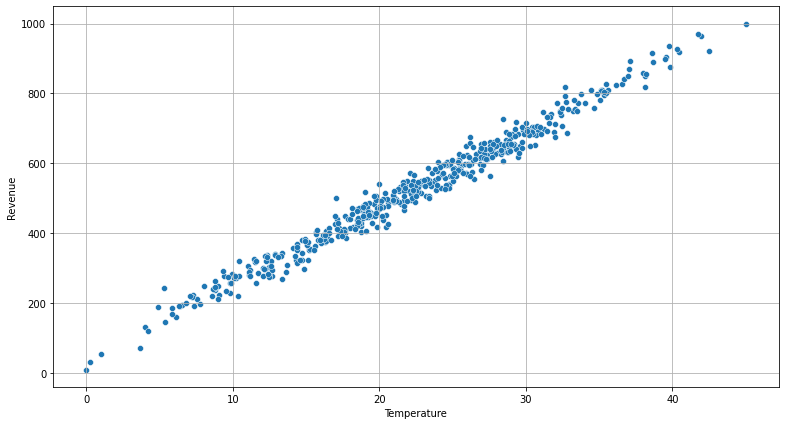

In [ ]:
plt.figure(figsize =(13,7))
sns.scatterplot(x ='Temperature',y ='Revenue',data = sales_df)
plt.grid()

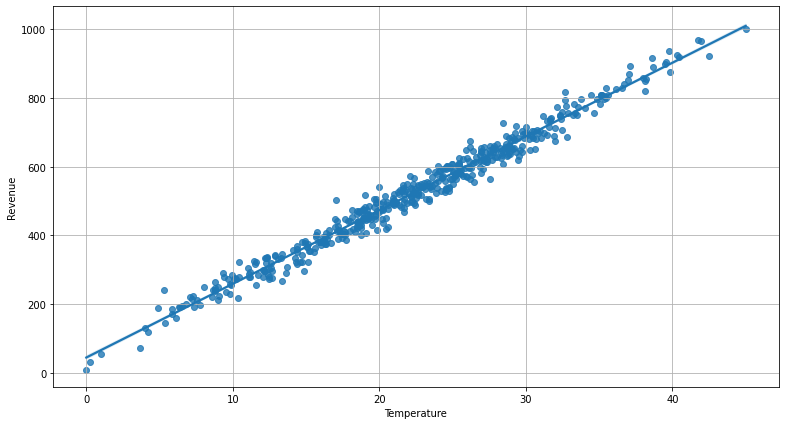

In [ ]:
plt.figure(figsize = (13,7))
sns.regplot(x='Temperature',y ='Revenue',data = sales_df)
plt.grid()

**CREATE TESTING AND TRAINING DATASET**

In [ ]:
X = sales_df['Temperature']
y = sales_df['Revenue']
X = np.array(X)
y = np.array(y)

In [ ]:
# reshaping array from (500,) to (500,1)
X = X.reshape(-1,1)
y = y.reshape(-1,1)
print(X.shape)
print(y.shape)

(500, 1)
(500, 1)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(400, 1)
(400, 1)
(100, 1)
(100, 1)


**TRAIN REGRESSION MODEL IN SCIKIT LEARN**

In [ ]:
from sklearn.linear_model import LinearRegression
SimpleLinearRegression = LinearRegression(fit_intercept=True)
SimpleLinearRegression.fit(X_train,y_train)
print('Linear Model Coeff(m)', SimpleLinearRegression.coef_)
print('Linear Model Coeff(b)',SimpleLinearRegression.intercept_)

Linear Model Coeff(m) [[21.34111351]]
Linear Model Coeff(b) [47.09216626]


**EVALUATE MODEL**

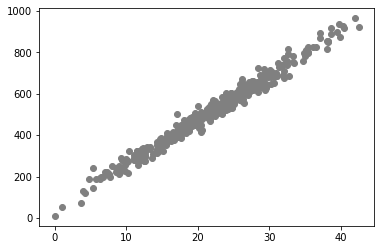

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(X_train,y_train,color = 'gray')

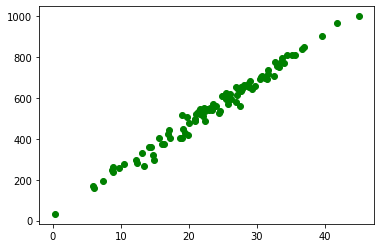

In [ ]:
plt.scatter(X_test,y_test,color ='g')

Text(0.5, 1.0, 'Revenue generated vs Temperature')

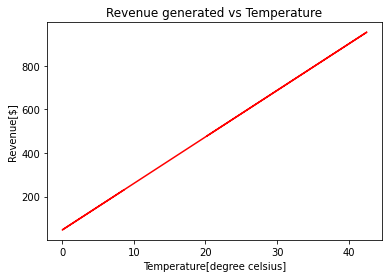

In [ ]:
plt.plot(X_train,SimpleLinearRegression.predict(X_train),color ='r')
plt.ylabel('Revenue[$]')
plt.xlabel('Temperature[degree celsius]')
plt.title('Revenue generated vs Temperature')

**ACCURACY OF MODEL**

In [ ]:
accuracy_LinearRegression = SimpleLinearRegression.score(X_test,y_test)
accuracy_LinearRegression


0.981618204679107

**USE TRAIN MODEL TO GENERATE PREDICTIONS**

In [ ]:
Temp = np.array([20])
Temp = Temp.reshape(-1,1)
Revenue = SimpleLinearRegression.predict(Temp)
print("Revenue predictions",Revenue)

Revenue predictions [[473.91443637]]
